In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2023-01-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2023_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-01-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7416,해운대구,17250,해운대구,9834,132.61%,"11,197"
1,2023-01-12,간장,오복왕표 0.9ℓ 1병,7147,해운대구,7980,해운대구,833,11.66%,"7,542"
2,2023-01-12,갈치,60cm정도 500g 1마리(냉동),11899,해운대구,22000,해운대구,10101,84.89%,"16,300"
3,2023-01-12,고등어,30㎝정도 500g 1마리,5000,해운대구,6341,해운대구,1341,26.82%,"5,864"
4,2023-01-12,달걀,오경슈퍼란60g정도 10개,3750,해운대구,4280,해운대구,530,14.13%,"4,007"
5,2023-01-12,닭고기,육계 1.0㎏,7980,해운대구,9988,해운대구,2008,25.16%,"8,649"
6,2023-01-12,대파,1.0㎏,3176,해운대구,4784,해운대구,1608,50.63%,"3,783"
7,2023-01-12,돼지고기,삼겹살 500g,11400,해운대구,18950,해운대구,7550,66.23%,"14,250"
8,2023-01-12,두부,500g 판두부(국산포장두부 420g) 1모,5194,해운대구,5620,해운대구,426,8.2%,"5,336"
9,2023-01-12,라면,신라면 120g 1봉지,820,해운대구,820,해운대구,0,0.0%,820


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2023-04-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2023_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-04-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7416,해운대구,17250,해운대구,9834,132.61%,"11,197"
1,2023-04-13,간장,오복왕표 0.9ℓ 1병,7147,해운대구,7980,해운대구,833,11.66%,"7,542"
2,2023-04-13,갈치,60cm정도 500g 1마리(냉동),6464,해운대구,17821,해운대구,11357,175.7%,"13,095"
3,2023-04-13,달걀,오경슈퍼란60g정도 10개,3750,해운대구,3990,해운대구,240,6.4%,"3,907"
4,2023-04-13,닭고기,육계 1.0㎏,5980,해운대구,11237,해운대구,5257,87.91%,"8,299"
5,2023-04-13,대파,1.0㎏,2586,해운대구,3944,해운대구,1358,52.51%,"3,069"
6,2023-04-13,돼지고기,삼겹살 500g,7900,해운대구,14300,해운대구,6400,81.01%,"11,700"
7,2023-04-13,두부,500g 판두부(국산포장두부 420g) 1모,3835,해운대구,5620,해운대구,1785,46.54%,"4,883"
8,2023-04-13,라면,신라면 120g 1봉지,820,해운대구,820,해운대구,0,0.0%,820
9,2023-04-13,맥주,하이트 500㎖ 1병,1550,해운대구,1810,해운대구,260,16.77%,"1,647"


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2023-07-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2023_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-07-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7185,해운대구,17250,해운대구,10065,140.08%,"11,450"
1,2023-07-13,간장,오복왕표 0.9ℓ 1병,7147,해운대구,7980,해운대구,833,11.66%,"7,542"
2,2023-07-13,갈치,60cm정도 500g 1마리(냉동),12132,해운대구,13636,해운대구,1504,12.4%,"12,777"
3,2023-07-13,고등어,30㎝정도 500g 1마리,4785,해운대구,7954,해운대구,3169,66.23%,"6,225"
4,2023-07-13,달걀,오경슈퍼란60g정도 10개,3511,해운대구,4280,해운대구,769,21.9%,"3,927"
5,2023-07-13,닭고기,육계 1.0㎏,8300,해운대구,11237,해운대구,2937,35.39%,"10,254"
6,2023-07-13,대파,1.0㎏,1968,해운대구,4100,해운대구,2132,108.33%,"3,140"
7,2023-07-13,돼지고기,삼겹살 500g,10900,해운대구,21450,해운대구,10550,96.79%,"15,583"
8,2023-07-13,두부,500g 판두부(국산포장두부 420g) 1모,5194,해운대구,5620,해운대구,426,8.2%,"5,336"
9,2023-07-13,라면,신라면 120g 1봉지,780,해운대구,820,해운대구,40,5.13%,793


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2023-10-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2023_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-10-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7416,해운대구,17250,해운대구,9834,132.61%,"11,197"
1,2023-10-12,간장,오복왕표 0.9ℓ 1병,4840,해운대구,7500,해운대구,2660,54.96%,"6,496"
2,2023-10-12,갈치,60cm정도 500g 1마리(냉동),12321,해운대구,15803,해운대구,3482,28.26%,"14,375"
3,2023-10-12,고등어,30㎝정도 500g 1마리,4081,해운대구,4421,해운대구,340,8.33%,"4,223"
4,2023-10-12,달걀,오경슈퍼란60g정도 10개,2000,해운대구,4280,해운대구,2280,114.0%,"3,493"
5,2023-10-12,닭고기,육계 1.0㎏,7300,해운대구,11975,해운대구,4675,64.04%,"10,171"
6,2023-10-12,대파,1.0㎏,3967,해운대구,5571,해운대구,1604,40.43%,"4,653"
7,2023-10-12,돼지고기,삼겹살 500g,11400,해운대구,14950,해운대구,3550,31.14%,"13,367"
8,2023-10-12,두부,500g 판두부(국산포장두부 420g) 1모,3835,해운대구,6067,해운대구,2232,58.2%,"5,174"
9,2023-10-12,라면,신라면 120g 1봉지,780,해운대구,780,해운대구,0,0.0%,780


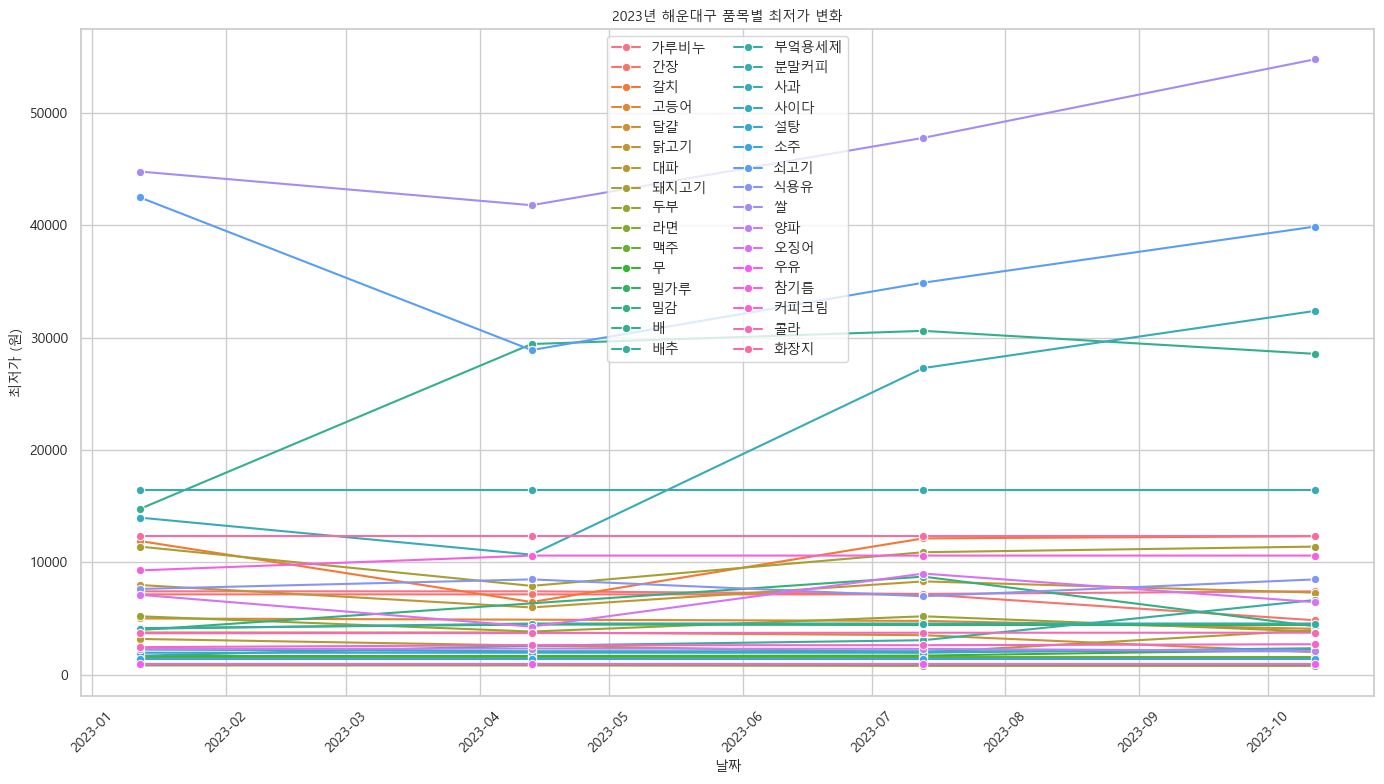

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2023_1q.csv")
q2 = pd.read_csv("해운대구2023_2q.csv")
q3 = pd.read_csv("해운대구2023_3q.csv")
q4 = pd.read_csv("해운대구2023_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2023년 해운대구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("해운대구2023_min.csv", index=False, encoding="utf-8-sig")

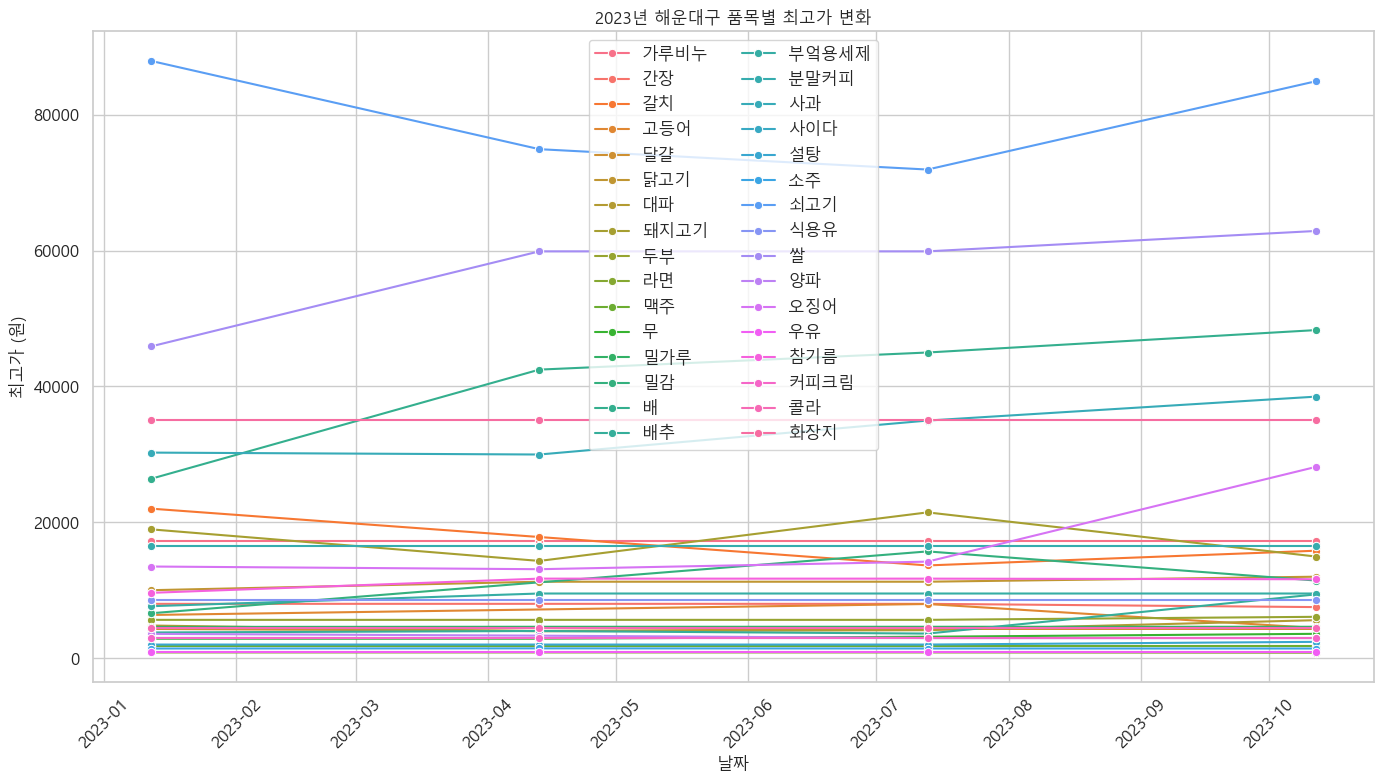

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2023_1q.csv")
q2 = pd.read_csv("해운대구2023_2q.csv")
q3 = pd.read_csv("해운대구2023_3q.csv")
q4 = pd.read_csv("해운대구2023_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2023년 해운대구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("해운대구2023_max.csv", index=False, encoding="utf-8-sig")